# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import silhouette_score


In [3]:
#Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [4]:
#drop data yang tidak diperlukan perlu
data=data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


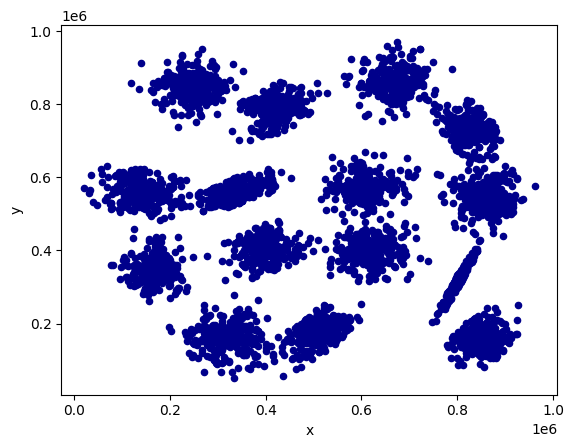

In [5]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='DarkBlue')

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

In [6]:
#Lakukan Proses Pencarian CLuster terbaik untuk data diatas

#START CODE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

k_range = range(2, 16)

silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    labels = kmeans.labels_
    score = silhouette_score(data_scaled, labels)

    print("n_clusters = ", k)
    print("silhouette score =", score)
#END CODE

n_clusters =  2
silhouette score = 0.3841312497039832
n_clusters =  3
silhouette score = 0.41502861863382084
n_clusters =  4
silhouette score = 0.44535097090618836
n_clusters =  5
silhouette score = 0.4671413640659645
n_clusters =  6
silhouette score = 0.4982683850341049
n_clusters =  7
silhouette score = 0.5268209932272566
n_clusters =  8
silhouette score = 0.5629730486993177
n_clusters =  9
silhouette score = 0.5807414412112643
n_clusters =  10
silhouette score = 0.5951654181510645
n_clusters =  11
silhouette score = 0.6179980008825143
n_clusters =  12
silhouette score = 0.6361627810984722
n_clusters =  13
silhouette score = 0.6676540237459704
n_clusters =  14
silhouette score = 0.6890969805746471
n_clusters =  15
silhouette score = 0.7116413455564674


In [7]:
#Lengkapi Code di bawah ini sehingga menghasilkan evaluasi jumlah cluster terbaik
#Contoh pemanggilan Library CLustering
#from sklearn.cluster import KMeans

#START CODE
kmeans = cluster.KMeans(n_clusters=k, n_init = 10 ,random_state=42)
kmeans.fit(data_scaled)
label = kmeans.fit_predict(data_scaled)
#END CODE

score = silhouette_score(data, label)
print("silhouette score=",score)

silhouette score= 0.711278614093076


## Proses Visualisasi hasil CLuster

In [8]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data

result = data.copy()

#START CODE
result['cluster'] = kmeans.fit_predict(data_scaled)
result.head()
#END CODE

,x,y,cluster
0,664159,550946,8
1,665845,557965,8
2,597173,575538,8
3,618600,551446,8
4,635690,608046,8


Text(47.75125, 0.5, 'Sumbu Y')

<Figure size 1000x600 with 0 Axes>

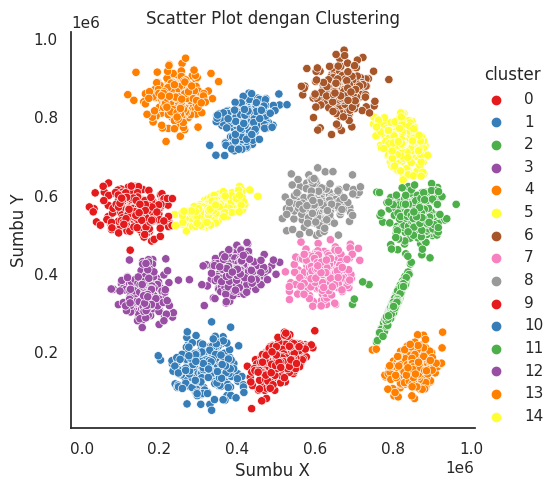

In [22]:
#Lakukan Plotting terhadap data
import seaborn as sns

#Gunakan library seaborn, lebih mudah.

#START CODE
sns.set(style="white")  # Menetapkan gaya latar belakang
plt.figure(figsize=(10, 6))  # Mengatur ukuran plot
plot = sns.relplot(data=result, x='x', y='y', hue='cluster', palette='Set1')

plt.title('Scatter Plot dengan Clustering')

# Menambahkan label sumbu
plt.xlabel('Sumbu X')
plt.ylabel('Sumbu Y')

#END CODE